In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/winequality-red.csv', sep=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

outcome variable - let's assume it is numerical, so regression problem

to do some plots and see the impact and effect of the predictors in the outcome variable we don't need to do any transformations in the data, we use it just like it is

1st - ANALYSE THE RELATIONSHIP BETWEEN ALL THE VARIABLES THROUGH PLOTS.

In [4]:
import seaborn as sns

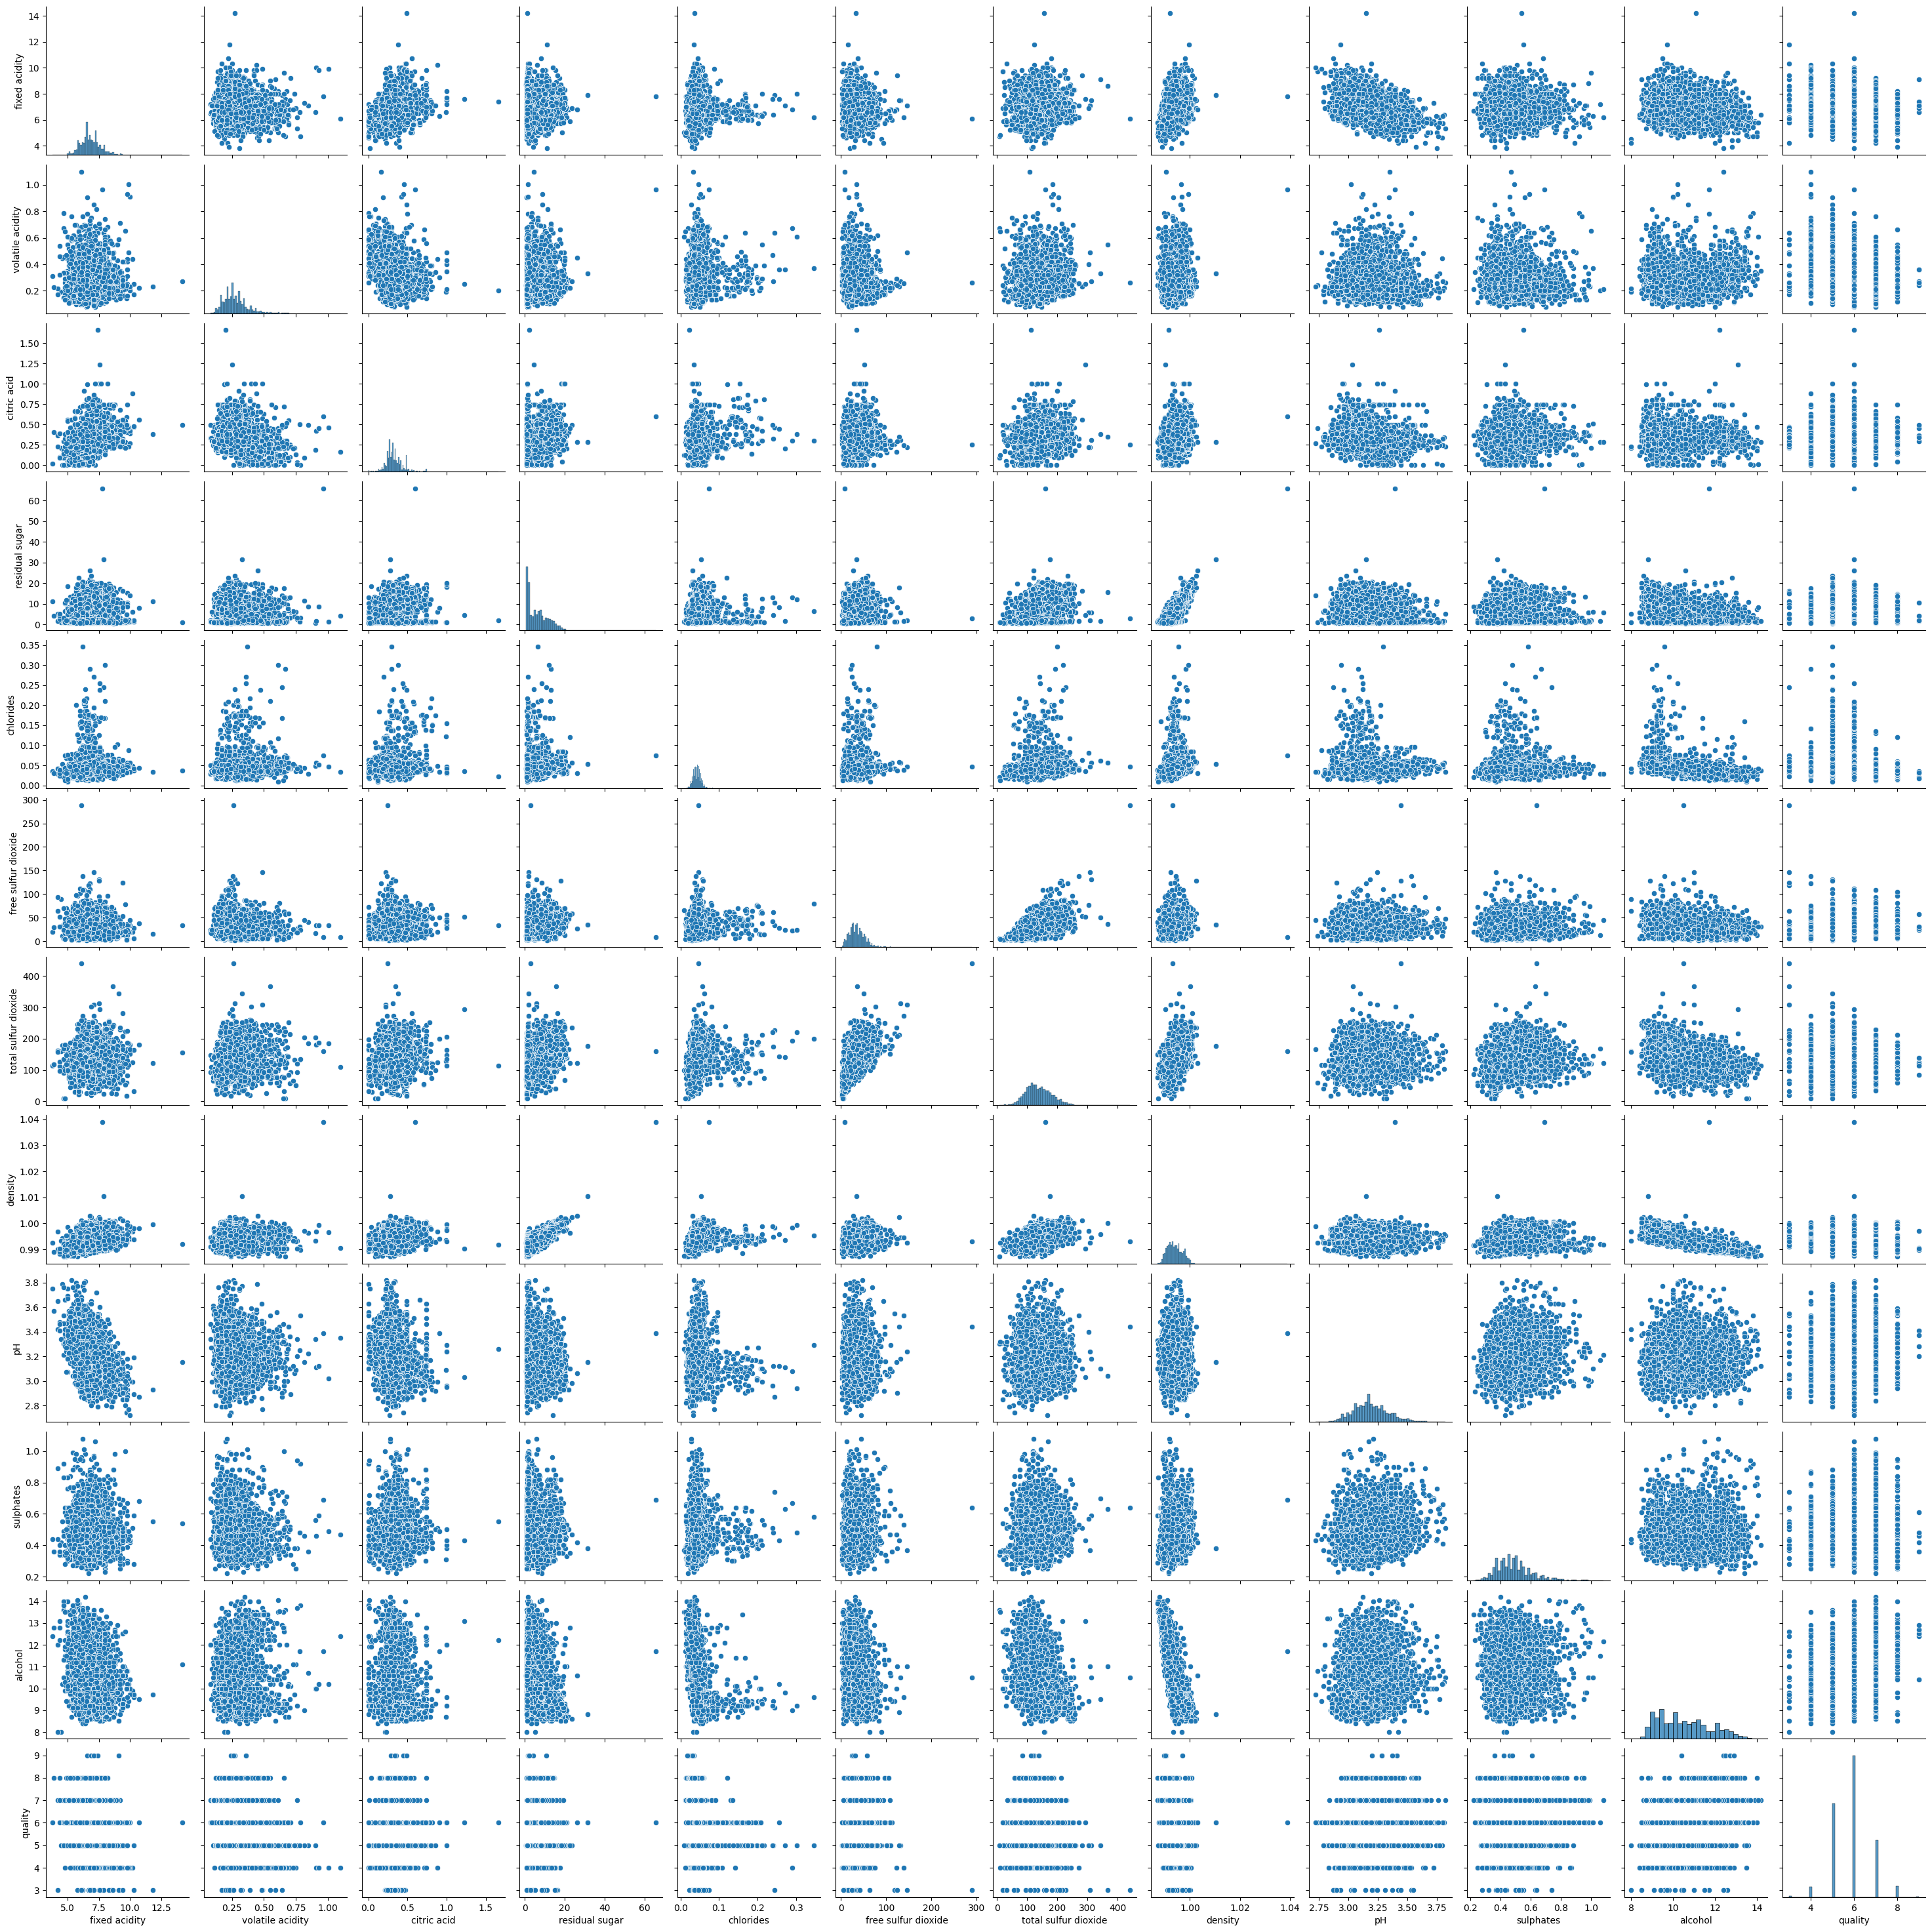

In [5]:
sns.pairplot(df)

2nd - HISTOGRAM OF THE OUTCOME VARIABLE - to see its distribution

<Axes: xlabel='quality', ylabel='Count'>

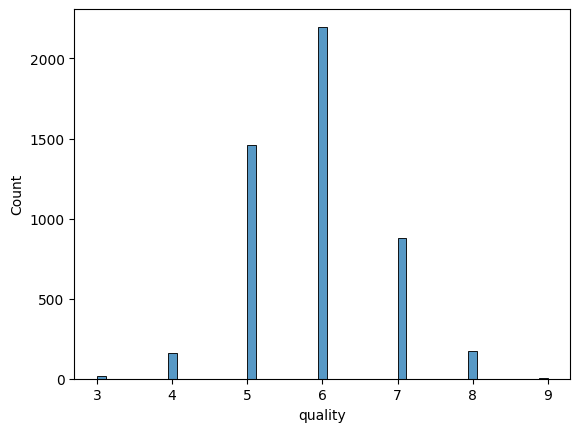

In [6]:
sns.histplot(df['quality'])

3rd - INSTEAD OF THE `PAIRPLOT` GENERAL LET'S USE A `HUE` -  several colors according to the classes of a certain variable

in the car radios dataset we have only used categorical variables and each one of the classes of the selected variable leads to a distribution

here, we can see that is possible to use `hue` with numerical variables, although it's very difficul to take conclusions in this case

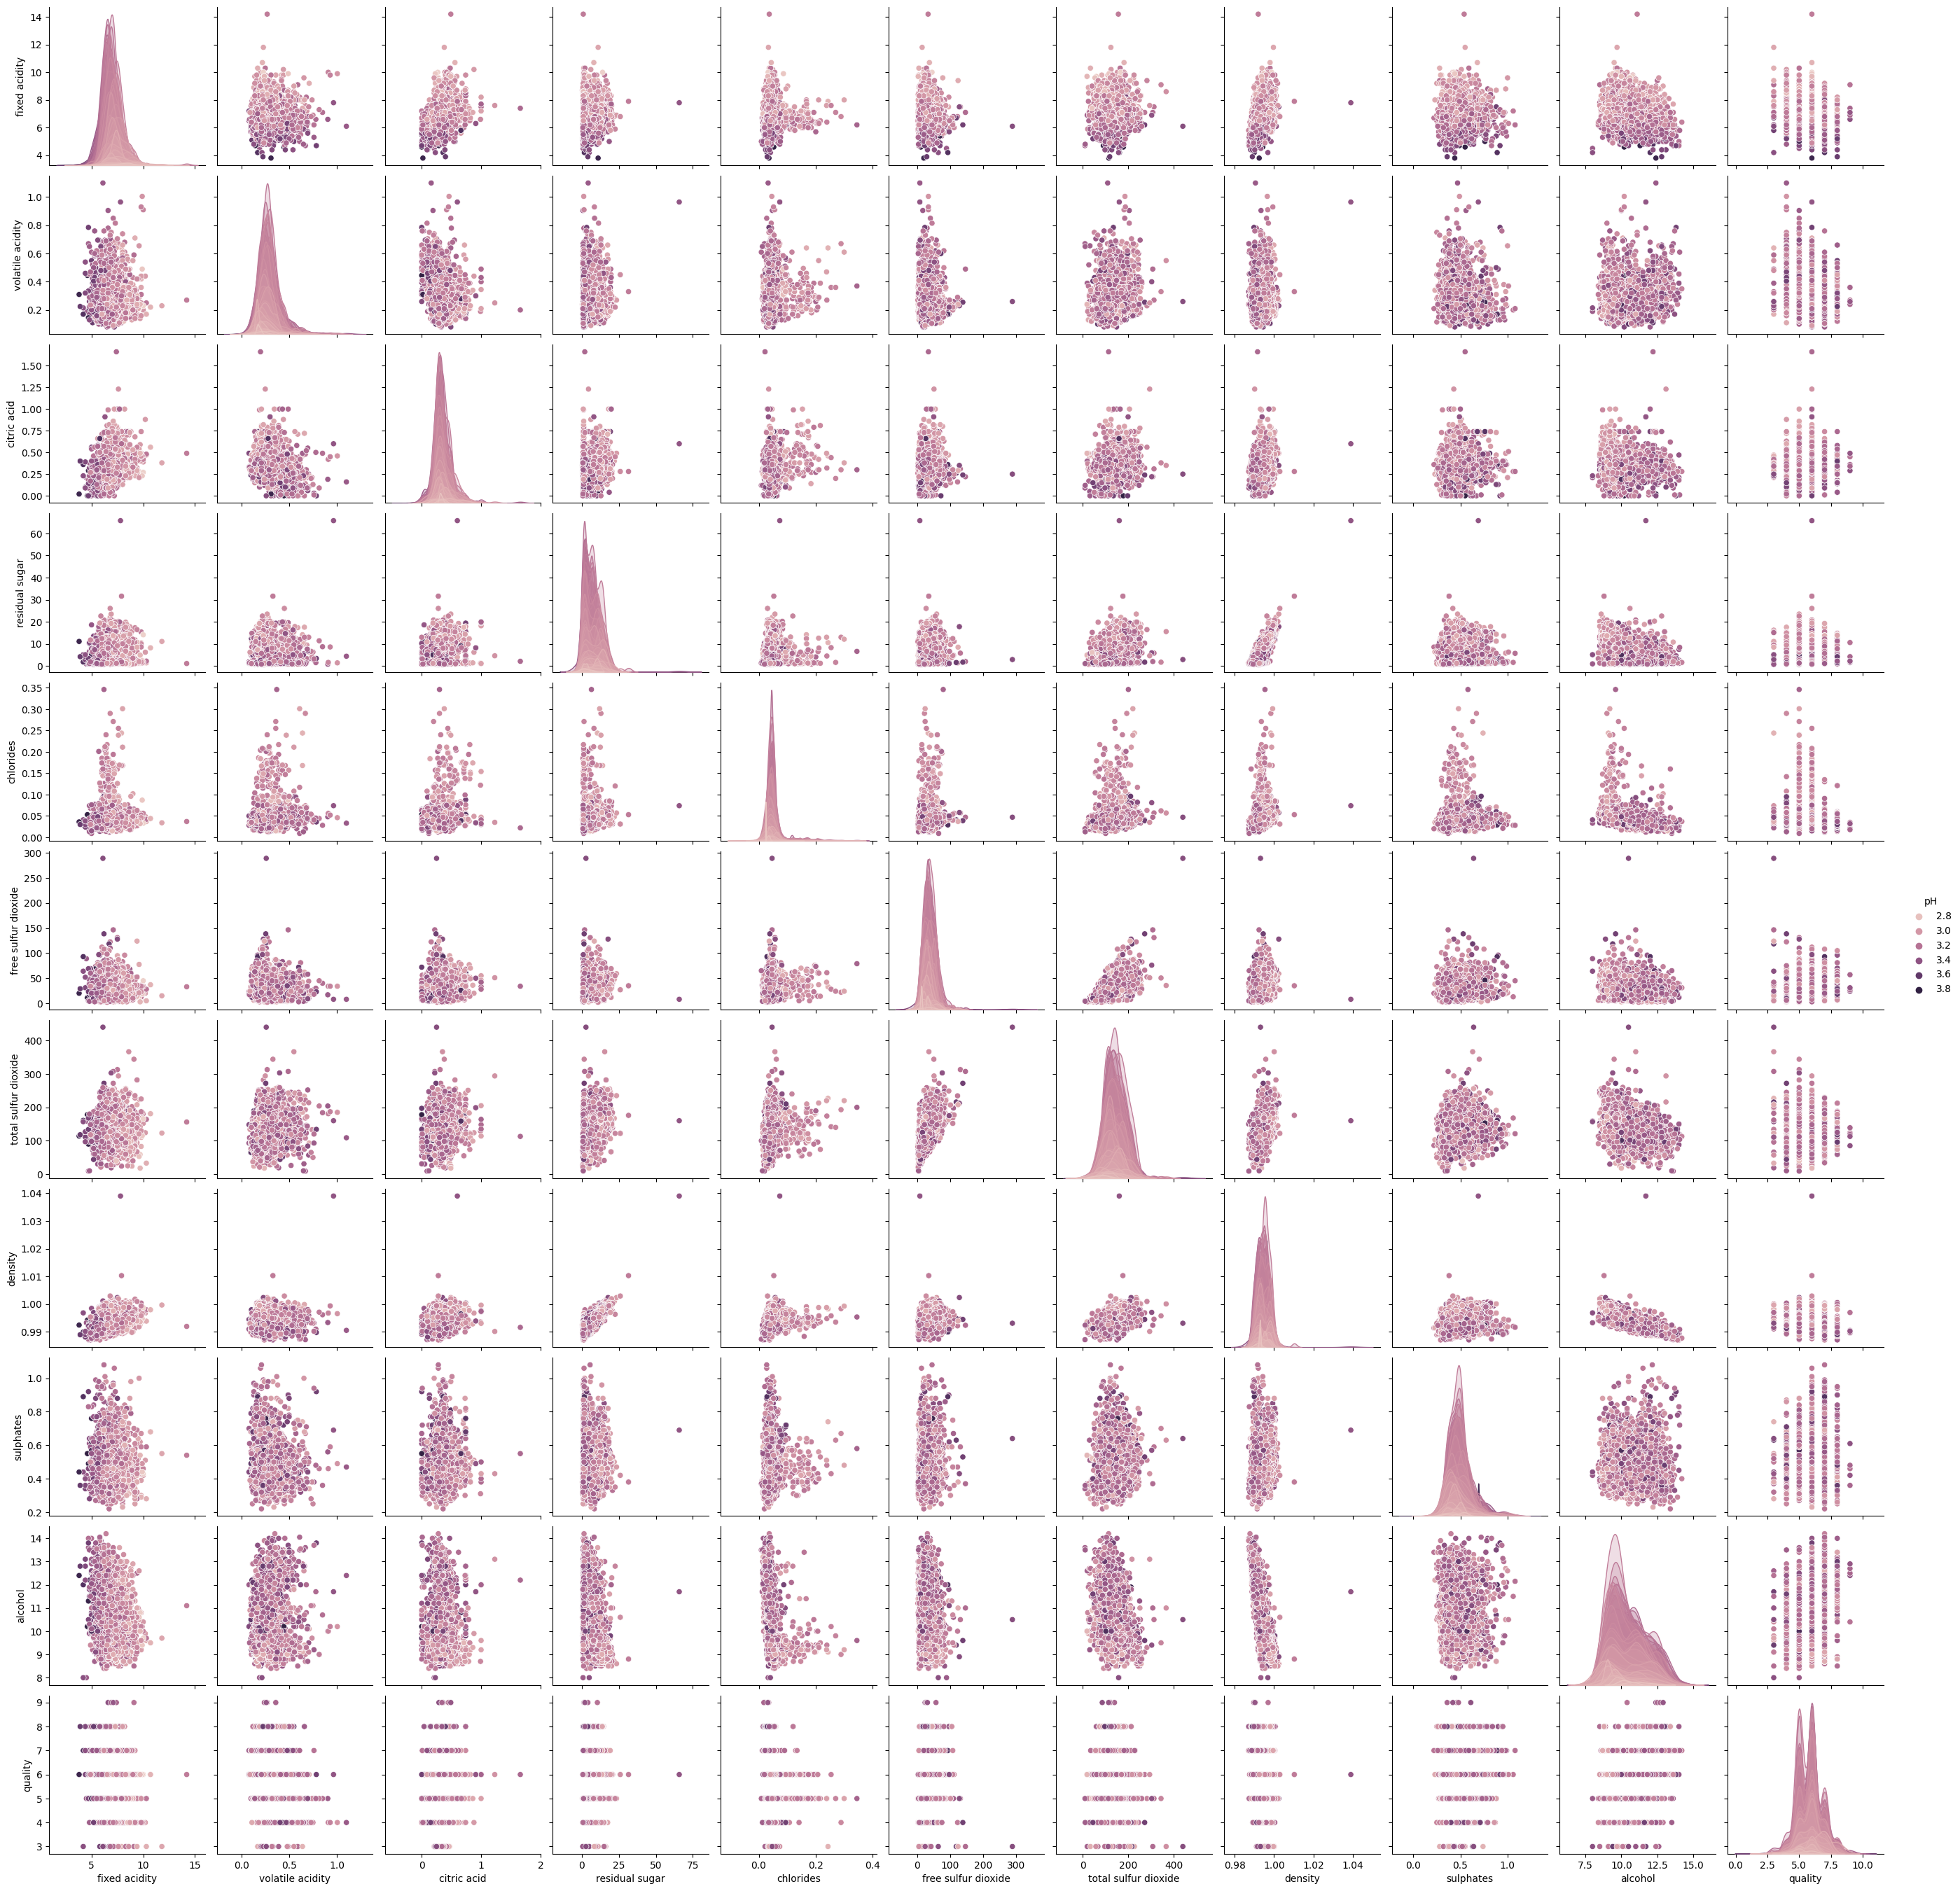

In [7]:
sns.pairplot(df, hue='pH')

4th - BOX PLOT - in this case, we have to choose the variables we want for each axis

<Axes: xlabel='residual sugar', ylabel='quality'>

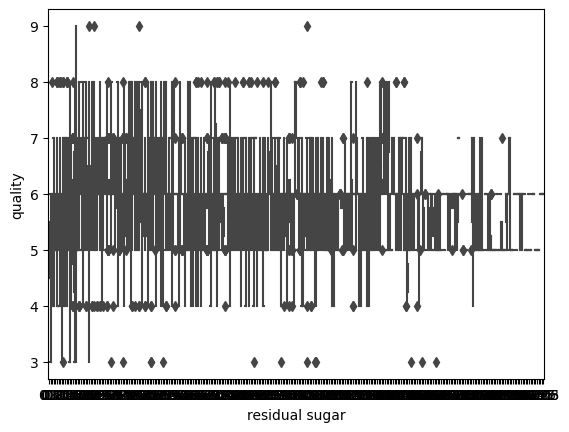

In [9]:
sns.boxplot(x = df['residual sugar'], y = df['quality'])

5th - CORRELATION BETWEEN VARIABLES - it allows us to verify which variables we should ponder to remove from the model.

In [10]:
corr = df.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

Using colors to be easier to analyse the results of correlation

<Axes: >

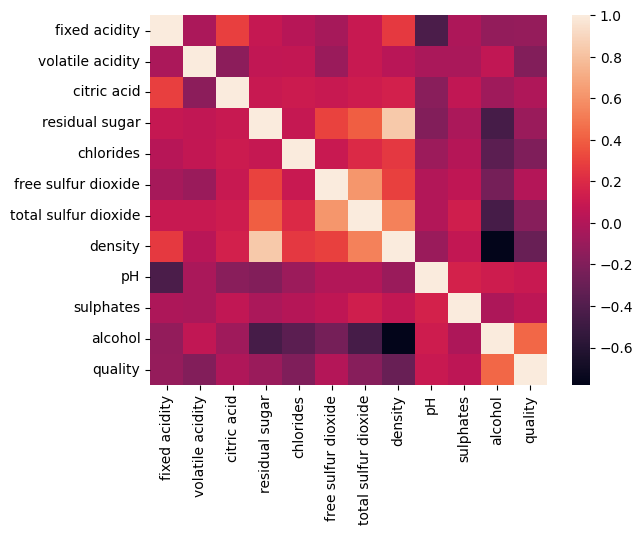

In [11]:
sns.heatmap(corr)

we should ponder to remove the variable **density** since it is highly correlated with alcohol and residual sugar and some other but less.